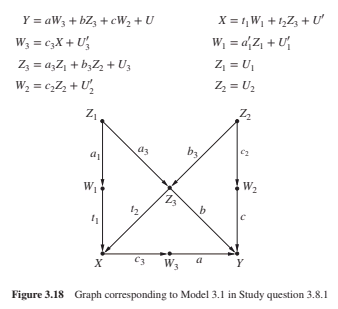

In [30]:
import numpy as np
import random

a=random.random()
b=random.random()
c=random.random()
t1=random.random()
t2=random.random()
c3=random.random()
a1_prime=random.random()
a3=random.random()
b3=random.random()
c2=random.random()

def gen_data(
    U_sd=1,
    U1_sd=1,
    U2_sd=1,
    U3_sd=1,
    U_prime_sd=1,
    U1_prime_sd=1,
    U2_prime_sd=1,
    U3_prime_sd=1,
    N=100000,
    a=a,
    b=b,
    c=c,
    t1=t1,
    t2=t2,
    c3=c3,
    a1_prime=a1_prime,
    a3=a3,
    b3=b3,
    c2=c2,
):
    U =  np.random.normal(0, U_sd, N)
    U1 = np.random.normal(0, U1_sd, N)
    U2 = np.random.normal(0, U2_sd, N)
    U3 = np.random.normal(0, U3_sd, N)
    U_prime = np.random.normal(0, U_prime_sd, N)
    U1_prime = np.random.normal(0, U1_prime_sd, N)
    U2_prime = np.random.normal(0, U2_prime_sd, N)
    U3_prime = np.random.normal(0, U3_prime_sd, N)
    Z1 = U1
    Z2 = U2
    W1 = a1_prime * Z1 + U1_prime
    Z3 = a3 * Z1 + b3 * Z2 + U3
    X = t1 * W1 + t2 * Z3 + U_prime
    W3 = c3 * X + U3_prime
    W2 = c2 * Z2 + U2_prime
    Y = a * W3 + b * Z3 + c * W2 + U
    return {
        'Z1': Z1,
        'Z2': Z2,
        'W1': W1,
        'Z3': Z3,
        'X': X,
        'W3': W3,
        'W2': W2,
        'Y': Y,
    }

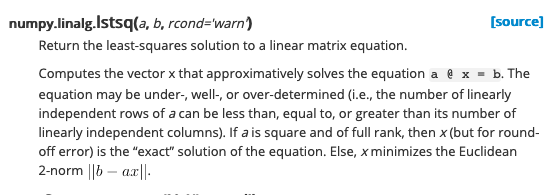

Goal: regress the following:
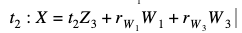

In [31]:
def regress(vars, target, sample):
    target_data = sample[target]
    data = np.zeros([len(vars), target_data.shape[0]])
    for i, var in enumerate(vars):
        data[i] = sample[var]
    return np.linalg.lstsq(data.T, sample[target])[0]

In [36]:
sample = gen_data()
print(regress(['W1'], 'Z1', sample=sample), a1_prime)

print("rxia's answer:")
print(regress(['Z3', 'W1', 'W3'], 'X', sample=sample)[0], t2)

print("regress on scm:")
print(regress(['W1', 'Z3'], 'X', sample=sample)[1], t2)

[0.17572546] 0.18110686607544113
rxia's answer:
0.41773072874117645 0.6086044834161383
regress on scm:
0.6066193947850391 0.6086044834161383


<ipython-input-31-259cc6b2c2be>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(data.T, sample[target])[0]


In [37]:
regress(['Z3', 'W1', 'W3'], 'X', sample=sample)

<ipython-input-31-259cc6b2c2be>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(data.T, sample[target])[0]


array([0.41773073, 0.1684202 , 0.46303674])

In [38]:
regress(['Z2', 'W2'], 'W1', sample=sample)

<ipython-input-31-259cc6b2c2be>:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(data.T, sample[target])[0]


array([ 0.00538223, -0.00134624])

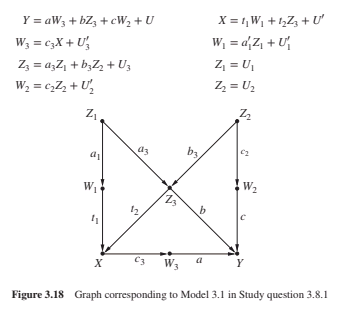